# Manipulating images

Author : Alasdair Newson

### Objective

This notebook introduces how to read, write and manipulate images with Python. You do not have to fill this part in, this is simply for instructive purposes. If you are already familiar with these operations in Python, you can skip to the main part of the TP.

### Packages

In order to deal with images in Python, we will need several packages :

- numpy
- matplotlib (for visualising)
- imageio (for reading and saving)
- scikit-image (for conversion from colour to RGB)

First, we import the necessary packages :

In [16]:
from matplotlib import pyplot as plt
import numpy as np
import imageio
from skimage import color

## Reading images

There are several packages which allow you to read and write images. In this lab work, we choose to use the ```imageio``` package.

Read the image contained in this directory (of a cat) with the following code :

In [18]:
file_name = 'images/cat.png'
img_in = imageio.imread(file_name)

The result of this is a numpy array. We can now inspect the shape of the image, the value of a pixel, and the type of data :

In [19]:
print('image shape : ', img_in.shape)
print('an image pixel : ',img_in[0,0,:])
print('data type : ',img_in.dtype)

image shape :  (317, 475, 3)
an image pixel :  [70 70 42]
data type :  uint8


As we can see, the image consists of three matrices : one for each colour channel. We can find the range of all the pixel data. Since the pixels are unsigned integers coded on 8 bits (uint8), the pixel values are between 0 and 255.

In [20]:
print('Max value : ', img_in.max())
print('Min value : ', img_in.min())

Max value :  244
Min value :  0


As we can see in this image, the upper bound is not reached. In this lab, we wish to work with grey-scale images, therefore, we must convert the pixels (which are three scalars) into one grey-level scalar. This can be done as follows

In [21]:
img_gray = color.rgb2gray(img_in)
print('Grey-level image data shape : ', img_gray.shape)
print('Grey-level image data type : ', img_gray.dtype)

Grey-level image data shape :  (317, 475)
Grey-level image data type :  float64


As you can see, this new image only has one channel, as expected, and the data type is now float.

## Displaying images

Images can be displayed in Python with the matplotlib package. When an image is displayed, the computer must know what the range of the pixel values are, in order to correctly map these values to actual pixels we see on the screen.

In the case of colour images, with uint8 type, the computer knows how to do this automatically. Show the image with the imshow function :

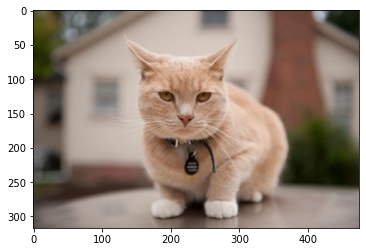

In [22]:
plt.imshow(img_in)

However, in the case of our grey-scale image, which is coded as floats, it is not necessarily clear what the dynamic should be. Therefore, it is necessary to tell the computer that it is indeed a grey-scale image. The following code displays the image with the range of the pixels converted to $0 \dots 1$

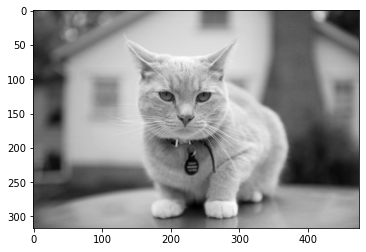

In [23]:
plt.imshow(img_gray,cmap='gray')

## Manipulating images

Now, since our (grey-scale) image is simply a matrix, we can take parts of image and work on them : 

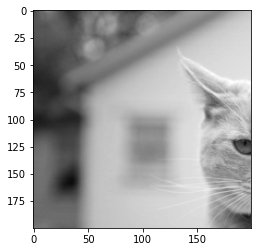

In [24]:
img_crop = img_gray[0:200,0:200]
plt.imshow(img_crop,cmap='gray')

We can change certain pixel values, for example by setting low pixel values to 0

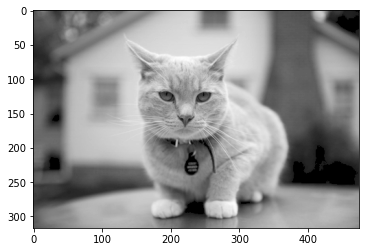

In [37]:
img_modified = img_gray.copy()
img_modified[img_modified<0.1] = 0.0
plt.imshow(img_modified,cmap='gray')

### Histograms

It is often necessary to find the distribution (histogram) of pixel values in an image. This can be done with the following function

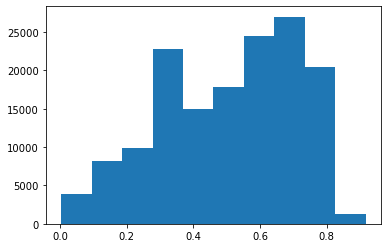

In [38]:
_ = plt.hist(img_gray.flatten())

As you can see, the number of bins in the histogram is too small here. You can control the number of bins with the ``nbins`` option :

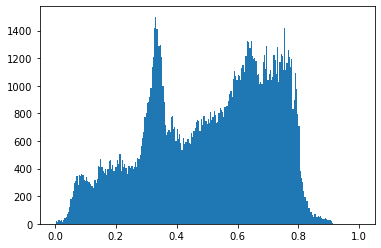

In [39]:
_ = plt.hist(img_gray.flatten(), bins=np.linspace(0,1,256))

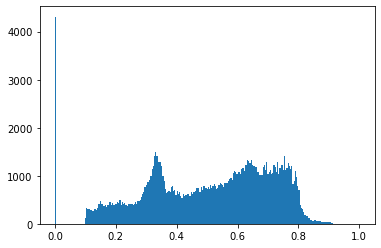

In [40]:
_ = plt.hist(img_modified.flatten(), bins=np.linspace(0,1,256))

You can see that the ``img_modified`` contains a peak at 0. This is where we set the image values to 0. If you want the actual values of the histogram, and you do not want the display of matplotlib, you can find them with  ``np.histogram``:

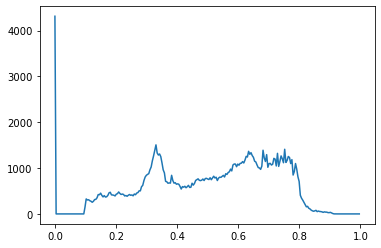

In [41]:
hist_vals, hist_bins = np.histogram(img_modified.flatten(), bins=np.linspace(0,1,255))
plt.plot(hist_bins[0:-1],hist_vals)

Note : the size of hist_bins and hist_vals are not the same : the end of the last bin is included, so hist_bins is one larger

## Writing images

You can write images with the ```imageio.imwrite``` function. Be careful, by definition, the images are supposed to have uint8 values, between 0 and 255

In [42]:
imageio.imwrite('cat_out.png', np.uint8(255.0*img_modified))

__IMPORTANT NOTE__ : If you are using google colab, it may be difficult to upload the necessary images. In this case, you can download the image you need from the following link :

In [ ]:
!wget "https://perso.telecom-paristech.fr/anewson/doc/images/palma.png"